# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup posts on a variety of topics. You'll train classifiers to distinguish posts by topics inferred from the text. Whereas with digit classification, where each input is relatively dense (represented as a 28x28 matrix of pixels, many of which are non-zero), here each document is relatively sparse (represented as a bag-of-words). Only a few words of the total vocabulary are active in any given document. The assumption is that a label depends only on the count of words, not their order.

The `sklearn` documentation on feature extraction may be useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on Slack, but <b> please prepare your own write-up with your own code. </b>

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that only textual features will be used, and restricting documents to 4 specific topics. By default, newsgroups data is split into training and test sets, but here the test set gets further split into development and test sets.  (If you remove the categories argument from the fetch function calls, you'd get documents from all 20 topics.)

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test  = fetch_20newsgroups(subset='test',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels   = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels     = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print('test label shape:',     test_labels.shape)
print('labels names:',         newsgroups_train.target_names)

training label shape: (2034,)
dev label shape: (676,)
test label shape: (677,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [ ]:
def P1(num_examples=5):
    ### STUDENT START ###


    #-----------------Get the first 5 lines of each example-----------------

    # Intialize sorted list by label
    alt_atheism_list = []
    talk_religion_misc_list = []
    comp_graphics_list = []
    sci_space_list = []

    # Iterate over training data, kill loop when all sorted lists have a minimum
    # of the provided paramater enteries
    for index, label in enumerate(train_labels):
      if (len(alt_atheism_list) >= num_examples and
          len(talk_religion_misc_list) >= num_examples and
          len(comp_graphics_list) >= num_examples and
          len(sci_space_list) >= num_examples):
        break

      elif (label == 0):
        alt_atheism_list.append(train_data[index])

      elif (label == 1):
        talk_religion_misc_list.append(train_data[index])

      elif (label == 2):
        comp_graphics_list.append(train_data[index])

      else:
        sci_space_list.append(train_data[index])

    # Limit the list to parameter and add to single list for ease of 
    # displaying the text
    combo_list = [alt_atheism_list[:num_examples], 
                  talk_religion_misc_list[:num_examples],
                  comp_graphics_list[:num_examples],
                  sci_space_list[:num_examples]]


    #-------------------Format and display the text-------------------------

    dash = '-' * 80
    print(dash)
    print('{:>40s}'.format('Sorted Output'))

    for index, list_ in enumerate(combo_list):
      for j_index, text in enumerate(list_):
        print(dash)
        print()
        print('Label =', categories[index])
        print()
        print(text)
    ### STUDENT END ###

P1(5)

--------------------------------------------------------------------------------
                           Sorted Output
--------------------------------------------------------------------------------

Label = alt.atheism

I have a request for those who would like to see Charley Wingate
respond to the "Charley Challenges" (and judging from my e-mail, there
appear to be quite a few of you.)  

It is clear that Mr. Wingate intends to continue to post tangential or
unrelated articles while ingoring the Challenges themselves.  Between
the last two re-postings of the Challenges, I noted perhaps a dozen or
more posts by Mr. Wingate, none of which answered a single Challenge.  

It seems unmistakable to me that Mr. Wingate hopes that the questions
will just go away, and he is doing his level best to change the
subject.  Given that this seems a rather common net.theist tactic, I
would like to suggest that we impress upon him our desire for answers,
in the following manner:

1. Ignore any fut

### Part 2:

Transform the training data into a matrix of **word** unigram feature vectors.  What is the size of the vocabulary? What is the average number of non-zero features per example?  What is the fraction of the non-zero entries in the matrix?  What are the 0th and last feature strings (in alphabetical order)?<br/>
_Use `CountVectorization` and its `.fit_transform` method.  Use `.nnz` and `.shape` attributes, and `.get_feature_names` method._

Now transform the training data into a matrix of **word** unigram feature vectors using your own vocabulary with these 4 words: ["atheism", "graphics", "space", "religion"].  Confirm the size of the vocabulary. What is the average number of non-zero features per example?<br/>
_Use `CountVectorization(vocabulary=...)` and its `.transform` method._

Now transform the training data into a matrix of **character** bigram and trigram feature vectors.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(analyzer=..., ngram_range=...)` and its `.fit_transform` method._

Now transform the training data into a matrix of **word** unigram feature vectors and prune words that appear in fewer than 10 documents.  What is the size of the vocabulary?<br/>
_Use `CountVectorization(min_df=...)` and its `.fit_transform` method._

Now again transform the training data into a matrix of **word** unigram feature vectors. What is the fraction of words in the development vocabulary that is missing from the training vocabulary?<br/>
_Hint: Build vocabularies for both train and dev and look at the size of the difference._

Notes:
* `.fit_transform` makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").
* `.fit_transform` and `.transform` return sparse matrix objects.  See about them at http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html.  

In [ ]:
def P2():
    ### STUDENT START ###


    #----------------------------Part A------------------------------------
    # Transform the training data into a matrix of word unigram feature vectors.

    # Create the transform
    vectorizer = CountVectorizer()

    # Learn Vocabulary Dictionary and return Matrix
    part_a = vectorizer.fit_transform(train_data)

    print("Part A")
    print('Number of Non Zero Values in the Data:', 
          part_a.nnz)
    print("Matrix Shape:", 
          part_a.shape)
    print("Size of Vocabulary", 
          len(vectorizer.get_feature_names()))
    print("First feature string:", 
          vectorizer.get_feature_names()[0])
    print("Last feature string:", 
          vectorizer.get_feature_names()[-1])
    print()


    #---------------------------Part B-------------------------------------
    # Now transform the training data into a matrix of word unigram feature 
    # vectors using your own vocabulary with these 4 words: 
    # ["atheism", "graphics", "space", "religion"].

    vectorizer = CountVectorizer(vocabulary= ["atheism", 
                                              "graphics", 
                                              "space", 
                                              "religion"])

    part_b = vectorizer.transform(train_data)

    print("Part B")
    print("Size of Vocabulary:", 
          len(vectorizer.get_feature_names()))
    print('Number of Non Zero Values in the Data:', 
          part_b.nnz)
    print()


    #---------------------------Part C-------------------------------------
    # Now transform the training data into a matrix of character bigram and 
    # trigram feature vectors. What is the size of the vocabulary?

    vectorizer = CountVectorizer(analyzer='char', 
                                 ngram_range=(2, 3))

    part_c = vectorizer.fit_transform(train_data)

    print("Part C")
    print("Size of Vocabulary:", 
          len(vectorizer.get_feature_names()))
    print()


    #---------------------------Part D-------------------------------------
    # Now transform the training data into a matrix of word unigram feature 
    # vectors and prune words that appear in fewer than 10 documents. 
    # What is the size of the vocabulary?

    vectorizer = CountVectorizer(min_df=10)

    part_d = vectorizer.fit_transform(train_data)

    print("Part D")
    print("Size of Vocabulary:", len(vectorizer.get_feature_names()))
    print()


   #---------------------------Part E-------------------------------------
   # Now again transform the training data into a matrix of word unigram 
   # feature vectors. What is the fraction of words in the development 
   # vocabulary that is missing from the training vocabulary?

    vectorizer_train = CountVectorizer()
    vectorizer_dev = CountVectorizer()

    part_e_train = vectorizer_train.fit_transform(train_data)
    part_e_dev = vectorizer_dev.fit_transform(dev_data)

    same_words = set(vectorizer_train.get_feature_names()) & set(vectorizer_dev.get_feature_names())

    print("Part E")
    print("Size of Training Vocabulary:", len(vectorizer_train.get_feature_names()))
    print("Size of dev Vocabulary:", len(vectorizer_dev.get_feature_names()))
    print()
    print("Vocab Comparison")
    print("The two vocabularies have ", len(same_words), "in common.")
    print("The training data has ", len(vectorizer_train.get_feature_names()) -
                                        len(same_words), 
                                        "unique words.")
    print("The dev data has ", len(vectorizer_dev.get_feature_names()) -
                                        len(same_words), 
                                        "unique words.")
    print("The training data is missing", 
          round(((len(vectorizer_dev.get_feature_names()) -
                len(same_words))/len(vectorizer_train.get_feature_names()))*100, 2),
          "% of words present in the dev data")
    

    ### STUDENT END ###

P2()

Part A
Number of Non Zero Values in the Data: 196700
Matrix Shape: (2034, 26879)
Size of Vocabulary 26879
First feature string: 00
Last feature string: zyxel

Part B
Size of Vocabulary: 4
Number of Non Zero Values in the Data: 546

Part C
Size of Vocabulary: 35478

Part D
Size of Vocabulary: 3064

Part E
Size of Training Vocabulary: 26879
Size of dev Vocabulary: 16246

Vocab Comparison
The two vocabularies have  12219 in common.
The training data has  14660 unique words.
The dev data has  4027 unique words.
The training data is missing 14.98 % of words present in the dev data


**Part A**


*   What is the size of the vocabulary?
    *    There is a total 26,879 unique words. This is determined by the number of vectors (rows) in the matrix.

*   What is the average number of non-zero features per example?
    *   the total numner of non zero fearures is 196700 / 2034. = 96.7 non zero values per example. 

*   What is the fraction of the non-zero entries in the matrix?
    *    196700 / (2034 x 26879) = 1.4%


*   What are the 0th and last feature strings (in alphabetical order)? 
    *   First string is "00"
    *   Last string is "zyxel" 

**Part B**
*    What is the average number of non-zero features per example?
    *    546/2034 = .0277 Non-zero features per example.

**Part C**
*     What is the size of the vocabulary?
    *    Size of Vocabulary = 35,478

**Pard D**
*    What is the size of the vocabulary?
    *    Size of Vocabulary = 3,064

**Part E**
*    What is the fraction of words in the development vocabulary that is missing from the training vocabulary?
    *    The training data is missing 14.98% of the words in the dev data

### Part 3:

Transform the training and development data to matrices of word unigram feature vectors.

1. Produce several k-Nearest Neigbors models by varying k, including one with k set to optimize f1 score.  For each model, show the k value and f1 score.
1. Produce several Naive Bayes models by varying smoothing (alpha), including one with alpha set approximately to optimize f1 score.  For each model, show the alpha value and f1 score.
1. Produce several Logistic Regression models by varying L2 regularization strength (C), including one with C set approximately to optimize f1 score.  For each model, show the C value, f1 score, and sum of squared weights for each topic.

* Why doesn't k-Nearest Neighbors work well for this problem?
* Why doesn't Logistic Regression work as well as Naive Bayes does?
* What is the relationship between logistic regression's sum of squared weights vs. C value?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer` and its `.fit_transform` and `.transform` methods to transform data.
* You can use `KNeighborsClassifier(...)` to produce a k-Nearest Neighbors model.
* You can use `MultinomialNB(...)` to produce a Naive Bayes model.
* You can use `LogisticRegression(C=..., solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.

In [ ]:
def P3():
    ### STUDENT START ###

    #-------------------------Part 1-----------------------------------------

    # Transform data to matrices of word unigrams
    vectorizer = CountVectorizer()

    unigram_train_matrix = vectorizer.fit_transform(train_data)
    unigram_dev_matrix = vectorizer.transform(dev_data)

    #  Produce several KNN models - One with an optimal F1 Score

    dash = '-' * 80
    print(dash)
    print('{:>50s}'.format('K-Nearest Neighbors Model'))
    print(dash)
    
    n_neighbors =[100,150,175,190,199,200,201,202,203,204,210,220,225,250,500]
    
    print()
    print("Optimal n_neighbor (k) value is: 202")
    print()

    for index in n_neighbors:

        #Initiate KNN Classifier and set the number of neighbors to the K_value
        #array
        knn_class = KNeighborsClassifier(n_neighbors = index)

        #Fit the KNN model with the training data
        knn_class.fit(unigram_train_matrix, train_labels)

        # Run the classifier on the dev data to get predictions
        x = knn_class.predict(unigram_dev_matrix)

        # Print accruacy of model
        # print("Mean Accuracy Score for K value of:", index,":",round(knn_class.score(unigram_dev_matrix, dev_labels),3))
        print("Mean Accuracy Score for K value of:", index,":",round(metrics.f1_score(x, dev_labels, average="weighted"),3))

    print()


    #--------------------------------Part 2-------------------------------

    # Produce Severial Naive Bayes Models - One set to an optimal F1 Score
    print(dash)
    print('{:>45s}'.format('Naive Bayes Models'))
    print(dash)
    print()
    print("Optimal alpha value for Multinomial Naive Bays is 0.1 and 0.15") 

    alpha = [1.0e-10, 0.0001, 0.001, 0.01, 0.05,0.9,0.99999, 0.1,0.1111111, 0.145, 0.15,0.155, 0.25, 0.5, 1.0, 2.0, 10.0]

    for index in alpha:
        # Initiate Classifier and set alpha to index value
        nb_class = MultinomialNB(alpha = index)

        # Fit the models with the training data
        nb_class.fit(unigram_train_matrix, train_labels)

        # Run the classifier on the dev data to get predictions
        x = nb_class.predict(unigram_dev_matrix)
        
        # Print Mean Accuracy Score of the model
        # print("Mean Accuracy Score for K value of:", index,":",round(nb_class.score(unigram_dev_matrix, dev_labels),3))
        print("Mean Accuracy Score for alpha value of:", index,":",round(metrics.f1_score(x, dev_labels, average="weighted"),3))
    print()


    #------------------------------Part 3---------------------------------

    # Produce Severial Logistic Regression Model - One set to optimal F1 Score
    print(dash)
    print('{:>45s}'.format('Logistic Regression Model'))
    print(dash)
    print()
    print("Optimal alpha value for Logistic Regression is 0.14")
    print()

    c = [0.0625,0.1,0.12,0.125,0.14,0.15,0.25,0.5,0.75,1.0,2.0,5.0]
    f1 = []
    sum_of_square = []

    for index in c:
        temp = []

        # Initiate Classifier
        log_class = LogisticRegression(C=index, solver="liblinear", multi_class="auto")

        # Fit model with training data
        log_class.fit(unigram_train_matrix, train_labels)

        # Run the classifier with the dev data
        x = log_class.predict(unigram_dev_matrix)

        # Print the Mean Accuracy score of the model
       # print("Mean Accuracy Score for C value of:", index,":",round(metrics.f1_score(x, dev_labels, average="weighted"),3))
        f1.append(round(metrics.f1_score(x, dev_labels, average="weighted"),3))
        
        for index, ar in enumerate(log_class.coef_):
            array = np.array(ar)
            array = array * array
           # print("    Sum of Squares for topic", categories[index], ":", round(sum(array), 3))
            temp.append(round(sum(array), 3))
        sum_of_square.append(temp)

    ### STUDENT END ###


    # Print in a table
    dash = '-' * 140
    print('{:<40s}'.format('Logestic Regrssion Model Results'))
    print(dash)

    print("{:<10} {:^25} {:^25} {:^25} {:^25} {:^25}".format("C", 
                                                             "f1", 
                                                             "SS alt.atheism",
                                                             "SS talk.religion.misc",
                                                             "SS comp.graphics",
                                                             "SS sci.space"))
    print(dash)

    for index, c_val in enumerate(c):
        print("{:<10} {:^25} {:^25} {:^25} {:^25} {:^25}".format(c_val, 
                f1[index], 
                sum_of_square[index][0],
                sum_of_square[index][1],
                sum_of_square[index][2],
                sum_of_square[index][3]))
    print(dash)

P3()

--------------------------------------------------------------------------------
                         K-Nearest Neighbors Model
--------------------------------------------------------------------------------

Optimal n_neighbor (k) value is: 202

Mean Accuracy Score for K value of: 100 : 0.463
Mean Accuracy Score for K value of: 150 : 0.463
Mean Accuracy Score for K value of: 175 : 0.46
Mean Accuracy Score for K value of: 190 : 0.475
Mean Accuracy Score for K value of: 199 : 0.487
Mean Accuracy Score for K value of: 200 : 0.484
Mean Accuracy Score for K value of: 201 : 0.487
Mean Accuracy Score for K value of: 202 : 0.488
Mean Accuracy Score for K value of: 203 : 0.486
Mean Accuracy Score for K value of: 204 : 0.486
Mean Accuracy Score for K value of: 210 : 0.474
Mean Accuracy Score for K value of: 220 : 0.48
Mean Accuracy Score for K value of: 225 : 0.484
Mean Accuracy Score for K value of: 250 : 0.467
Mean Accuracy Score for K value of: 500 : 0.45

------------------------------


ANSWER:


Why doesn't k-Nearest Neighbors work well for this problem?

*   KNN operates under the assumption that alike entities will group close to eachother, so the nearest, or group of nearest, data would indicate what catagory the new data point most likely belongs to. 
*    In order to process text in the machine learning model, we are converting it into a Feature vector. This essentialy counts the number of times a word appears and is placed in the postion of the matrix that represents that word.
*   The closeness of the neighbors is calculated by computing the distance of the new data point to the existing labeled data points in the model. 
*    Since many of the same words are present accross the text samples in the labeled data, it is plausable that these common words are causing noise in the system. To improve the score we could look at filtering out these common words that are not unique in each genre.
*    In addition, the "Curse of Dimensioanlity" rears up due to the large amounts of dimensions in a sparsly populated matrix. [K-Nearest Neighbors and the Curse of Dimensionality](https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d)


Why doesn't Logistic Regression work as well as Naive Bayes does?
*    This logistic regression model uses boolean outputs. In this case the logistic regrssion model is multi case and uses a one-vs-all approach. This means a model is generated for each topic and the model with the highest value from the individual topic model is the prediction.This means multi case logistic regression models are as strong as their weakest model.
*    Naive Bays creates indipendent modesl for each catagory and assigns probabilities for each n-gram for each model. It then sums the probabilities for each n-gram in each model and the model with the highest probability becomes the models prediction.
*    I belive the preformance difference is due to with the size of the vocabulary in the training model, the sparse nature of the data favors the performance of the independence assumption in Naive Bayes. Increased data in the training set would see an improvement in Logistic Regressions performance. [Naive Bayes vs Logistic Regression](https://medium.com/@sangha_deb/naive-bayes-vs-logistic-regression-a319b07a5d4c)



What is the relationship between logistic regression's sum of squared weights vs. C value?
*    As the c value increases, the sum of squared rates increases in a non-linear fashion. 



### Part 4:

Transform the data to a matrix of word **bigram** feature vectors.  Produce a Logistic Regression model.  For each topic, find the 5 features with the largest weights (that's 20 features in total).  Show a 20 row (features) x 4 column (topics) table of the weights.

Do you see any surprising features in this table?

Notes:
* Train on the transformed training data.
* You can use `CountVectorizer` and its `.fit_transform` method to transform data.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a Logistic Regression model.
* You can use `LogisticRegression`'s `.coef_` method to get weights for each topic.
* You can use `np.argsort` to get indices sorted by element value. 

In [ ]:
def P4():
    ### STUDENT START ###
    # Instantiate the vectorizer
    vectorizer = CountVectorizer(ngram_range = (2,2))

    # Convert data to bigram
    bigram_train_matrix = vectorizer.fit_transform(train_data)
    bigram_dev_matrix = vectorizer.transform(dev_data)

    # Get the vocabulary
    words = np.array(vectorizer.get_feature_names())

    # Instantiate and train the model
    log_class = LogisticRegression(C=0.5, 
                                   solver="liblinear", 
                                   multi_class="auto")
    log_class.fit(bigram_train_matrix, 
                  train_labels)

    # Get the top 5 vocab bigrams from each catagory
    top_20_words = []
    top_20_index = []
    for index in range(log_class.coef_.shape[0]):
      for j_index in np.argsort(np.absolute(log_class.coef_))[index, -5:]:
        top_20_words.append(words[j_index])
        top_20_index.append(j_index)

    # Get the weights for each bigram
    weights = []
    for index in range(log_class.coef_.shape[0]):
      temp = []
      for j_index in top_20_index:
        temp.append(log_class.coef_[index][j_index])
      weights.append(temp)

    # Print in a table
    dash = '-' * 85
    print('{:<40s}'.format('Top 20 Bigrams and Catagory Weights'))
    print(dash)

    print("{:<20} {:^15} {:^15} {:^15} {:^15}".format("Bigram", 
                                                      "alt.atheism", 
                                                      "talk.religion.misc",
                                                      "comp.graphics",
                                                      "sci.space"))
    dash = '-' * 85
    print(dash)
    for index, word in enumerate(top_20_words):
      print("{:<20} {:=15} {:=15} {:=15} {:=15}".format(word, 
                                                        round(weights[0][index],10), 
                                                        round(weights[1][index],10),
                                                        round(weights[2][index],10),
                                                        round(weights[3][index],10)))
    
    print(dash)

    ### STUDENT END ###

P4()

Top 20 Bigrams and Catagory Weights     
-------------------------------------------------------------------------------------
Bigram                 alt.atheism   talk.religion.misc  comp.graphics     sci.space   
-------------------------------------------------------------------------------------
you are                 0.4727403748 -  0.2798937965 -  0.4813049498    0.0283729089
was just                 0.482050373 -  0.1314176445 -  0.1288820235 -  0.2274686475
cheers kent             0.5557195735 -  0.6979177389 -  0.6637655258    0.5348076602
claim that               0.605548733 -   0.199066963 -  0.2743454749 -  0.1403644567
looking for          -  0.6303409598    1.1083746904 -  0.5000499012 -  0.5718685549
is there             -  0.3408817396    0.7549978422 -  0.4682491336 -  0.2570786681
out there            -  0.2748025682    0.7586578224 -  0.4790567214 -  0.2770893302
comp graphics        -   0.292165732    0.8012075729 -  0.3708849128 -  0.2851856133
in advance         

ANSWER: 

Do you see any surprising features in this table?

*   Observations
    *    The term "Looking For" ranks in the top 5 wieghts in 3 out of the 4 catagories
    *    In general, although not true in all cases, the weights for top 5 n-grams in each catagory tend to be positive where the weights for the rest of the 15 n-grams tend to be negetive
    * Nouns are heavily represented in the highest weighted n-grams


### Part 5:

To improve generalization, it is common to try preprocessing text in various ways before splitting into words. For example, you could try transforming strings to lower case, replacing sequences of numbers with single tokens, removing various non-letter characters, and shortening long words.

Produce a Logistic Regression model (with no preprocessing of text).  Evaluate and show its f1 score and size of the dictionary.

Produce an improved Logistic Regression model by preprocessing the text.  Evaluate and show its f1 score and size of the vocabulary.  Try for an improvement in f1 score of at least 0.02.

How much did the improved model reduce the vocabulary size?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `CountVectorizer(preprocessor=...)` to preprocess strings with your own custom-defined function.
* `CountVectorizer` default is to preprocess strings to lower case.
* You can use `LogisticRegression(C=0.5, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `metrics.f1_score(..., average="weighted")` to compute f1 score.
* If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular.

In [ ]:
def better_preprocessor(s):
    ### STUDENT START ###

    # Convert all Text to Lower Case -> No Change
    x = s.lower()

    # Eliminate all special chars - Reduces b y 0.10
    x = re.sub(r'\W', ' ', x)

    # Remove Escape Characters -> No Change
    x = re.sub('[\s]', ' ', x)

    # Eliminate all short text
    x = remove_short_text(x, 4)

    # Truncate Long Text -> Only Reduces 
    x = truncate_text(x, 11)

    # Convert all numbers to 0 -> Reduces by 0.5
    x = re.sub('[0-9]+', '0', x)

    # Delete all numbers - > Reduces by 0.05
    # x = re.sub('[0-9]+', '', x)

    # Convert only numbers to 0 -> No Change
    #x = num_to_0(x)

    # Eliminate strings with numbers -> Reduced by 0.05
    #x = del_words_with_num(x)

    return x


#-------------------Helper Functions for Preprocessing-----------------------


# Removes text under the length of the lc variable
def remove_short_text(x, lc):
  return " ".join(word for word in x.split()if len(word) > lc)

# Truncates the text by the word_length veriable
def truncate_text(x, word_length):
  temp = []

  for word in x.split():
    if len(word) >= word_length:
      temp.append(word[:word_length])
    else:
      temp.append(word)

  return " ".join(temp)

# Converts all numbers to 0 to commonize all number tokens
def num_to_0(x):
  temp = []

  for word in x.split():
    if word.isdecimal():
      temp.append('0')
    else:
      temp.append(word)

  return " ".join(temp)

# Deletes all words with numbers
def del_words_with_num(x):
  temp = []
  for word in x.split():
    if len(re.findall(r'\d+', word)) == 0:
            temp.append(word)

  return " ".join(temp)
      
    ### STUDENT END ###

def P5():
    ### STUDENT START ###
    # Vectorize text
    vectorizer = CountVectorizer()
    p5_train_transform = vectorizer.fit_transform(train_data)
    p5_dev_transform = vectorizer.transform(dev_data)

    # Fit log reg
    log_class = LogisticRegression(C=0.5, 
                                   solver="liblinear", 
                                   multi_class="auto")
    log_class.fit(p5_train_transform, 
                  train_labels)

    # Assess model
    first_model = log_class.predict(p5_dev_transform)

    # Get vocab
    vocab_unp = vectorizer.get_feature_names()

    # Print unprocessed model F1 Score
    print("F1 Score of unprocessed Text is: ", round(metrics.f1_score(
        first_model, dev_labels, average="weighted"),2))
    print("Vocab Size of unprocessed Text is: ", 
          len(vocab_unp))
    

    #------------------------Preprocessed Data-----------------------------

    # Preprocess train data
    vectorizer = CountVectorizer(preprocessor = better_preprocessor)

    # Vectorize
    prepro_train_transform = vectorizer.fit_transform(train_data)
    prepro_dev_transform = vectorizer.transform(dev_data)

    # Train preprocessed model
    log_class = LogisticRegression(C=0.5, 
                                   solver="liblinear", 
                                   multi_class="auto")
    log_class.fit(prepro_train_transform, 
                  train_labels)

    # Assess preprocessed model
    prepro_model = log_class.predict(prepro_dev_transform)

    # Get vocab
    vocab_pr = vectorizer.get_feature_names()

    #---------------------------Print Output------------------------------------

    # Print preprocessed model F1 Score
    print("F1 Score of processed Text is: ", round(metrics.f1_score(
        prepro_model, dev_labels, average="weighted"),2))
    print("Vocab Size of processed Text is: ", 
          len(vocab_pr))
    print()
    
    print("The improved model reduced the vocab size by",
          len(vocab_unp) - len(vocab_pr)) 

    ### STUDENT END ###

P5()

F1 Score of unprocessed Text is:  0.72
Vocab Size of unprocessed Text is:  26879
F1 Score of processed Text is:  0.74
Vocab Size of processed Text is:  20117

The improved model reduced the vocab size by 6762


Answer:

How much did the improved model reduce the vocabulary size?
*    The improved model reduced the vocab size by 6,762

### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. Logistic regression seeks the set of weights that minimizes errors in the training data AND has a small total size. The default L2 regularization computes this size as the sum of the squared weights (as in Part 3 above). L1 regularization computes this size as the sum of the absolute values of the weights. Whereas L2 regularization makes all the weights relatively small, L1 regularization drives many of the weights to 0, effectively removing unimportant features.

For several L1 regularization strengths ...<br/>
* Produce a Logistic Regression model using the **L1** regularization strength.  Reduce the vocabulary to only those features that have at least one non-zero weight among the four categories.  Produce a new Logistic Regression model using the reduced vocabulary and **L2** regularization strength of 0.5.  Evaluate and show the L1 regularization strength, vocabulary size, and f1 score associated with the new model.

Show a plot of f1 score vs. log vocabulary size.  Each point corresponds to a specific L1 regularization strength used to reduce the vocabulary.

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?

Notes:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `LogisticRegression(..., penalty="l1")` to produce a logistic regression model using L1 regularization.
* You can use `LogisticRegression(..., penalty="l2")` to produce a logistic regression model using L2 regularization.
* You can use `LogisticRegression(..., tol=0.015)` to produce a logistic regression model using relaxed gradient descent convergence criteria.  The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


For the initial model, a regularization strength of 0.5 was used
The vocab size is  1124
The f1 Score is  0.685


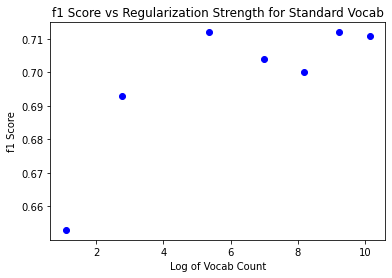

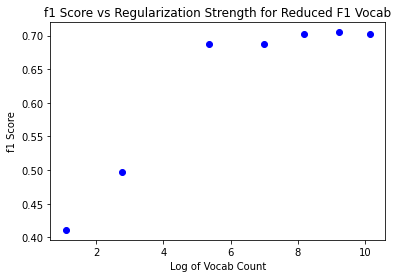

In [ ]:
def P6():
  ### STUDENT START ###
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)


    # -----------------------Set up the Models-------------------------------

    ### STUDENT START ###
    
    # Vectorize the data
    vectorizer = CountVectorizer()
    p6_train_data = vectorizer.fit_transform(train_data)
    p6_dev_data = vectorizer.transform(dev_data)

    # Get the vocab
    all_the_words = np.array(vectorizer.get_feature_names())

    # Initial L1 Model
    log_class_l1 = LogisticRegression(solver="liblinear", 
                                      penalty="l1",
                                      tol=0.015)
    log_class_l1.fit(p6_train_data, 
                     train_labels)


    # --------------------Reduce the vocabulary------------------------------

    # Git the wieghts from L1
    l1_weights = np.absolute(log_class_l1.coef_)

    # Combine the wights to one array (ID non-zero coefficieants)
    sum_of_weights = sum(l1_weights)

    # Sort out all the zero weight words
    reduced_words = []
    for index, weight in enumerate(sum_of_weights):
      if(weight > 0):
        reduced_words.append(all_the_words[index])


    # -----------Create new L2 model with reduced vocabulary----------------

    # Fit vectorizer and transform training data
    vectorizer = CountVectorizer(vocabulary = reduced_words)
    p6_reduced_train_data = vectorizer.transform(train_data)
    p6_reduced_dev_data = vectorizer.transform(dev_data)

    # Instantiate and train log model with L2
    l2_log_class = LogisticRegression(C=0.5, 
                                      solver="liblinear", 
                                      penalty="l2",
                                      tol=0.015)
    l2_log_class.fit(p6_reduced_train_data,
                     train_labels)
    
    x = l2_log_class.predict(p6_reduced_dev_data)
    
    #Evaluate and show the L1 regularization strength, vocabulary size, 
    # and f1 score associated with the new model.

    print("For the initial model, a regularization strength of 0.5 was used")
    print("The vocab size is ", len(reduced_words))
    print("The f1 Score is ", round(metrics.f1_score(x , 
                                                     dev_labels, 
                                                     average="weighted"),
                                    3))
    

    # -----------------Data to Generate Visualization ----------------------

    # Generate an arbatrary list of C values
    c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    word_counts = []
    f1_red = []
    f1_std = []

    # Iterate over C Values to get the reduced vocab form l1
    for c in c_values:
        log_class_3 = LogisticRegression(C = c,
                                         solver="liblinear", 
                                         penalty="l1",
                                         tol=0.015)
        log_class_3.fit(p6_train_data, 
                         train_labels)
        
        p3_weights = np.absolute(log_class_3.coef_)
        sum_of_weights = sum(p3_weights)


        # Capture the number of words in the vocab for each c value
        reduced_words = []
        for index, weight in enumerate(sum_of_weights):
            if(weight > 0):
                reduced_words.append(all_the_words[index])

        # Log word count of vocab
        word_counts.append(len(reduced_words))

        # Instantiate the vectorizor
        vec_red = CountVectorizer(vocabulary = reduced_words)
        vec_train_red = vec_red.transform(train_data)
        vec_dec_red = vec_red.transform(dev_data)

        # Instantiate l2 model Standard vocab
        l2_log_class_3 = LogisticRegression(C = c, 
                                                solver="liblinear", 
                                                penalty="l2",
                                                tol=0.015)
        l2_log_class_3.fit(p6_train_data,
                           train_labels)
        
        x = l2_log_class_3.predict(p6_dev_data)
        
        # Get the l2 accuracy based off the full model
        f1_std.append(round(metrics.f1_score(x, 
                                             dev_labels, 
                                             average="weighted"),
                            3))


        # Instantiate l2 model Reduced vocab
        
        l2_log_class_red_3 = LogisticRegression(C = c, 
                                                solver="liblinear", 
                                                penalty="l2",
                                                tol=0.015)
        l2_log_class_red_3. fit(vec_train_red,
                                train_labels)
        
        x = l2_log_class_red_3.predict(vec_dec_red)

        # Get the l2 accuracy based off the reduced model
        f1_red.append(round(metrics.f1_score(x , 
                                             dev_labels, average="weighted"),
                            3))


    #----------------------Graph the two lines-----------------------------


    log_vocab = np.log(word_counts)

    # Graph the standard vocab graph
    plt.title("f1 Score vs Regularization Strength for Standard Vocab")
    plt.xlabel("Log of Vocab Count")
    plt.ylabel("f1 Score")
    #plt.plot(c_values, f1_std, color = "blue")
    plt.plot(log_vocab, f1_std, "o", color = "blue")
    plt.show()

    # Graph the standard vocab graph
    plt.title("f1 Score vs Regularization Strength for Reduced F1 Vocab")
    plt.xlabel("Log of Vocab Count")
    plt.ylabel("f1 Score")
    # plt.plot(c_values, f1_red, color = "blue")
    plt.plot(log_vocab, f1_red, "o", color = "blue")
    plt.show()

    # Rewrite this with helper functions to reduce redunent code
    ### STUDENT END ###

P6()

ANSWER:

How does performance of the models based on reduced vocabularies compare to that of a model based on the full vocabulary?
*    When the C value is very small (0.01) the model with the standard vocabulary performed better than that of the reduced vocabulary.
*    When the C value becomes larger, the model with the standard vocabulary sharply declines in performance improves as the C value increases while the reduced vocabulary models performance (f1) hovers around 0.7, yielding a higher performance over all of the other c values assessed.

### Part 7:

How is `TfidfVectorizer` different than `CountVectorizer`?

Produce a Logistic Regression model based on data represented in tf-idf form, with L2 regularization strength of 100.  Evaluate and show the f1 score.  How is `TfidfVectorizer` different than `CountVectorizer`?

Show the 3 documents with highest R ratio, where ...<br/>
$R\,ratio = maximum\,predicted\,probability \div predicted\,probability\,of\,correct\,label$

Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

Note:
* Train on the transformed training data.
* Evaluate on the transformed development data.
* You can use `TfidfVectorizer` and its `.fit_transform` method to transform data to tf-idf form.
* You can use `LogisticRegression(C=100, solver="liblinear", multi_class="auto")` to produce a logistic regression model.
* You can use `LogisticRegression`'s `.predict_proba` method to access predicted probabilities.

In [ ]:
def P7():
    ### STUDENT START ###

    # Transform the data
    tfid_vect = TfidfVectorizer()
    p7_train = tfid_vect.fit_transform(train_data)
    p7_dev = tfid_vect.transform(dev_data)

    # Define and train the model
    log_class = LogisticRegression(C=100, solver="liblinear", multi_class="auto")
    log_class.fit(p7_train, train_labels)

    # Predict over transformed dev data
    x = log_class.predict(p7_dev)

    # Get the predicte probability of correct label
    probabilities = log_class.predict_proba(p7_dev)

    # Get Maximum predicted probability and compute r ratio for each entry
    r_ratio = []
    for index, probability in enumerate(probabilities):
      max_prob = max(probability)
      actual_prob = probability[dev_labels[index]]
      r_ratio.append(max_prob / actual_prob)

    r_ratio = np.array(r_ratio)

    # Get the top 3 examples
    top_index = r_ratio.argsort()[-3:]

    # Output f1 score
    print("The f1 Score is ", round(metrics.f1_score(x, 
                                                     dev_labels, 
                                                     average="weighted"),
                                    3))
    print()

    # Generate the Output
    dash = '-' * 85
    print(dash)
    print('{:>50s}'.format('Top 3 Enteries'))
    print(dash)

    for index in top_index:
      print("With a r_ratio of:", round(r_ratio[index],3))
      print("Actual label: ", categories[dev_labels[index]])
      print("Predicted Label: ", categories[np.argmax(probabilities[index])])
      print()
      print(dev_data[index])
      print(dash)


    ### STUDENT END ###

P7()

The f1 Score is  0.767

-------------------------------------------------------------------------------------
                                    Top 3 Enteries
-------------------------------------------------------------------------------------
With a r_ratio of: 287.307
Actual label:  alt.atheism
Predicted Label:  sci.space


The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...

-------------------------------------------------------------------------------------
With a r_ratio of: 325.004
Actual label:  sci.space
Predicted Label:  talk.religion.misc

Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible.
-------------------------------------------------------------------------------------
With a r_ratio of: 929.357
Actual label:  sci.space
Predicted Label:  talk.religion.misc

I am pleased to announce that a *revise

ANSWER:

How is TfidfVectorizer different than CountVectorizer?
*    TfidfVectorizer transforms a count matrix into a score calculated by the term-frequency times the inverse document frequency. The CountVectorizor simply counts the number of times the the term-frequencty appears in each document.
*    CountVectorizor reuturns its counts in Ints and TfidfVectorizer returns its weights in floats.


Explain what the R ratio describes.  What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

*    R Ratio
    *    R ratio = maximum predicted probability / predicted probability of correct label
    *    The r ratio measures the ratio of the probability of the label the model selected over the probality of the actual label.
    *    This shows a ratio of how far the models prediction was off
    *    An ideal score would be 1.0, indicating the label the model predicted was the correct label.

*    Mistakes the model is making
    *    It appears the model is confusing key terms like "space" and "Mormon" and as such overweighting the key words.
*    Potential Improvements
    *    We could try to increase the n-gram length which would help with context
    *    We could try an L1 regularization and adjust the regularization strength to tune the r ratio

### Part 8 EXTRA CREDIT:

Produce a Logistic Regression model to implement your suggestion from Part 7.